In [1]:
# Import pandas dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
# Load cleaned byarea_df
c_byarea_df = pd.read_csv('Resources/cleaned_byarea_df.csv', ',')
c_byarea_df.head()

C:\Users\yingk\anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
0,Alabama,359.7,374.7,367.2,Incidence,2293259,All Races,Female,All Cancer Sites Combined,1999,397.3,413.8,405.5
1,Alabama,160.6,170.5,165.5,Mortality,2293259,All Races,Female,All Cancer Sites Combined,1999,184.8,196.1,190.4
2,Alabama,362.1,377.1,369.5,Incidence,2302835,All Races,Female,All Cancer Sites Combined,2000,403.2,419.8,411.4
3,Alabama,160.8,170.6,165.7,Mortality,2302835,All Races,Female,All Cancer Sites Combined,2000,186.5,197.9,192.2
4,Alabama,377.7,392.9,385.2,Incidence,2309496,All Races,Female,All Cancer Sites Combined,2001,423.3,440.3,431.7


In [3]:
# check c_byarea_df columns
c_byarea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949308 entries, 0 to 949307
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AREA                   949308 non-null  object 
 1   AGE_ADJUSTED_CI_LOWER  949308 non-null  float64
 2   AGE_ADJUSTED_CI_UPPER  949308 non-null  float64
 3   AGE_ADJUSTED_RATE      949308 non-null  float64
 4   EVENT_TYPE             949308 non-null  object 
 5   POPULATION             949308 non-null  int64  
 6   RACE                   949308 non-null  object 
 7   SEX                    949308 non-null  object 
 8   SITE                   949308 non-null  object 
 9   YEAR                   949308 non-null  int64  
 10  CRUDE_CI_LOWER         949308 non-null  float64
 11  CRUDE_CI_UPPER         949308 non-null  float64
 12  CRUDE_RATE             949308 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 94.2+ MB


In [4]:
# load smoking_rate.csv file
smoking_df = pd.read_csv('Resources/smoking_rate.csv')
smoking_df.head(3)

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alabama,24.3,23.8,21.5,21.1,21.4,21.5,20.9,19.2,20.2,17.2
1,Alaska,22.9,20.5,22.6,19.9,19.1,19.0,21.0,19.1,17.4,17.1
2,Arizona,19.3,17.1,16.3,16.5,14.0,14.7,15.6,14.0,14.9,13.1


In [5]:
# load obesity_rate.csv file
obesity_df = pd.read_csv('Resources/obesity_rate.csv')
obesity_df.head(3)

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,33.0,32.0,33.0,32.4,33.5,35.6,35.7,36.3,36.2,36.1
1,Alaska,25.2,27.4,25.7,28.4,29.7,29.8,31.4,34.2,29.5,30.5
2,Arizona,25.2,25.1,26.0,26.8,28.9,28.4,29.0,29.5,30.0,31.4


In [6]:
# load per_capita_income file
income_df = pd.read_csv('Resources/cleaned_per_capita_income.csv')
income_df.head(3)

,GeoName,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,28693,30672,31617,31839,32717,34280,35868,38120,39883,...,40683,42747,44548,44798,46887,48725,49613,51550,53786,56250
1,Alabama,23333,24306,25057,25648,26673,28434,29949,31474,32739,...,33946,35010,35824,36014,37055,38531,39014,40223,41539,43288
2,Alaska,29951,32044,33626,34756,35996,37016,39075,41157,43906,...,49652,52569,53708,52812,55867,57575,56278,57189,59618,61316


## prepare smoking data

In [7]:
# reshape smoking_df to long form to merge with cancer data
# how to: https://towardsdatascience.com/how-to-reshape-a-pandas-dataframe-98b42c428a8

# first need to rename each column in order to use the wide_to_long()
smoking_df.rename(columns={'2011':'smoking_2011',
                           '2012':'smoking_2012',
                           '2013':'smoking_2013',
                           '2014':'smoking_2014',
                           '2015':'smoking_2015',
                           '2016':'smoking_2016',
                           '2017':'smoking_2017',
                           '2018':'smoking_2018',
                           '2019':'smoking_2019',
                           '2020':'smoking_2020'}, inplace=True)

In [8]:
smoking_df.head()

,State,smoking_2011,smoking_2012,smoking_2013,smoking_2014,smoking_2015,smoking_2016,smoking_2017,smoking_2018,smoking_2019,smoking_2020
0,Alabama,24.3,23.8,21.5,21.1,21.4,21.5,20.9,19.2,20.2,17.2
1,Alaska,22.9,20.5,22.6,19.9,19.1,19.0,21.0,19.1,17.4,17.1
2,Arizona,19.3,17.1,16.3,16.5,14.0,14.7,15.6,14.0,14.9,13.1
3,Arkansas,27.0,25.0,25.9,24.7,24.9,23.6,22.3,22.7,20.2,21.1
4,California,13.7,12.6,12.5,12.9,11.7,11.0,11.3,11.2,10.0,8.8


In [9]:
# convert smoking_df to long format
smoking_long_df = pd.wide_to_long(smoking_df, 
                              stubnames=['smoking'],
                              i='State',
                              j='YEAR',
                              sep="_",
                              suffix='\w+')
smoking_long_df

,,smoking
State,YEAR,
Alabama,2011,24.3
Alaska,2011,22.9
Arizona,2011,19.3
Arkansas,2011,27.0
California,2011,13.7
...,...,...
West Virginia,2020,22.0
Wisconsin,2020,13.3
Wyoming,2020,16.4


In [10]:
# Adding back index for ease of merging later
smoking_long_df = smoking_long_df.reset_index()
smoking_long_df

,State,YEAR,smoking
0,Alabama,2011,24.3
1,Alaska,2011,22.9
2,Arizona,2011,19.3
3,Arkansas,2011,27.0
4,California,2011,13.7
...,...,...,...
525,West Virginia,2020,22.0
526,Wisconsin,2020,13.3
527,Wyoming,2020,16.4
528,Guam,2020,20.0


## prepare obesity data

In [11]:
# reshape obesity_df to long form to merge with cancer data
obesity_df.rename(columns={'2010':'obesity_2010',
                           '2011':'obesity_2011',
                           '2012':'obesity_2012',
                           '2013':'obesity_2013',
                           '2014':'obesity_2014',
                           '2015':'obesity_2015',
                           '2016':'obesity_2016',
                           '2017':'obesity_2017',
                           '2018':'obesity_2018',
                           '2019':'obesity_2019'}, inplace=True)

In [12]:
# convert obesity_df to long format
obesity_long_df = pd.wide_to_long(obesity_df, 
                              stubnames=['obesity'],
                              i='State',
                              j='YEAR',
                              sep="_",
                              suffix='\w+')
obesity_long_df

,,obesity
State,YEAR,
Alabama,2010,33.0
Alaska,2010,25.2
Arizona,2010,25.2
Arkansas,2010,30.9
California,2010,24.7
...,...,...
West Virginia,2019,39.7
Wisconsin,2019,34.2
Wyoming,2019,29.7


## prepare INCOME data

In [13]:
# first need to rename each column in order to use the wide_to_long()
income_df.rename(columns={'1999':'INCOME_1999',
                       '2000':'INCOME_2000',
                       '2001':'INCOME_2001',
                       '2002':'INCOME_2002',
                       '2003':'INCOME_2003',
                       '2004':'INCOME_2004',
                       '2005':'INCOME_2005',
                       '2006':'INCOME_2006',
                       '2007':'INCOME_2007',
                       '2008':'INCOME_2008',
                       '2009':'INCOME_2009',
                       '2010':'INCOME_2010',
                       '2011':'INCOME_2011',
                       '2012':'INCOME_2012',
                       '2013':'INCOME_2013',
                       '2014':'INCOME_2014',
                       '2015':'INCOME_2015',
                       '2016':'INCOME_2016',
                       '2017':'INCOME_2017',
                       '2018':'INCOME_2018',
                       '2019':'INCOME_2019',}, inplace=True)

In [14]:
# convert income_df to long format
income_long_df = pd.wide_to_long(income_df, 
                              stubnames=['INCOME'],
                              i='GeoName',
                              j='YEAR',
                              sep="_",
                              suffix='\w+')
income_long_df

,,INCOME
GeoName,YEAR,
United States,1999,28693
Alabama,1999,23333
Alaska,1999,29951
Arizona,1999,24960
Arkansas,1999,21871
...,...,...
Virginia,2019,59073
Washington,2019,64189
West Virginia,2019,42951


## prepare cancer data

In [15]:
# filter for rows for state lung cancer mortality rate by all sex and race 
cancer_df = c_byarea_df.loc[(c_byarea_df['EVENT_TYPE']=='Mortality') &
                              (c_byarea_df['SEX']!='Male and Female') &
                              (c_byarea_df['RACE']!='All Races') &
                              (c_byarea_df['SITE']!='All Cancer Sites Combined') &
                              (c_byarea_df['YEAR']!= 20152019)
                              ]
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224910 entries, 3191 to 948163
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AREA                   224910 non-null  object 
 1   AGE_ADJUSTED_CI_LOWER  224910 non-null  float64
 2   AGE_ADJUSTED_CI_UPPER  224910 non-null  float64
 3   AGE_ADJUSTED_RATE      224910 non-null  float64
 4   EVENT_TYPE             224910 non-null  object 
 5   POPULATION             224910 non-null  int64  
 6   RACE                   224910 non-null  object 
 7   SEX                    224910 non-null  object 
 8   SITE                   224910 non-null  object 
 9   YEAR                   224910 non-null  int64  
 10  CRUDE_CI_LOWER         224910 non-null  float64
 11  CRUDE_CI_UPPER         224910 non-null  float64
 12  CRUDE_RATE             224910 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 24.0+ MB


In [16]:
cancer_df.head()

,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
3191,Alabama,0.0,51.9,0.0,Mortality,11411,American Indian/Alaska Native,Female,Brain and Other Nervous System,1999,0.0,32.3,0.0
3193,Alabama,0.0,44.9,0.0,Mortality,12506,American Indian/Alaska Native,Female,Brain and Other Nervous System,2000,0.0,29.5,0.0
3195,Alabama,0.0,43.1,0.0,Mortality,12933,American Indian/Alaska Native,Female,Brain and Other Nervous System,2001,0.0,28.5,0.0
3197,Alabama,0.0,41.2,0.0,Mortality,13377,American Indian/Alaska Native,Female,Brain and Other Nervous System,2002,0.0,27.6,0.0
3199,Alabama,0.0,39.0,0.0,Mortality,13863,American Indian/Alaska Native,Female,Brain and Other Nervous System,2003,0.0,26.6,0.0


In [17]:
# Pick out just the columns needed for our linear regression analysis
# CRUDE_RATE as the independent variable
cancer_mr_df = cancer_df[['AREA', 'YEAR', 'RACE', 'SEX', 'SITE', 'AGE_ADJUSTED_RATE']]
cancer_mr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224910 entries, 3191 to 948163
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   AREA               224910 non-null  object 
 1   YEAR               224910 non-null  int64  
 2   RACE               224910 non-null  object 
 3   SEX                224910 non-null  object 
 4   SITE               224910 non-null  object 
 5   AGE_ADJUSTED_RATE  224910 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 12.0+ MB


In [18]:
cancer_mr_df

,AREA,YEAR,RACE,SEX,SITE,AGE_ADJUSTED_RATE
3191,Alabama,1999,American Indian/Alaska Native,Female,Brain and Other Nervous System,0.0
3193,Alabama,2000,American Indian/Alaska Native,Female,Brain and Other Nervous System,0.0
3195,Alabama,2001,American Indian/Alaska Native,Female,Brain and Other Nervous System,0.0
3197,Alabama,2002,American Indian/Alaska Native,Female,Brain and Other Nervous System,0.0
3199,Alabama,2003,American Indian/Alaska Native,Female,Brain and Other Nervous System,0.0
...,...,...,...,...,...,...
948153,Wyoming,2015,White,Male,Urinary Bladder,4.7
948157,Wyoming,2016,White,Male,Urinary Bladder,6.2
948159,Wyoming,2017,White,Male,Urinary Bladder,5.6
948161,Wyoming,2018,White,Male,Urinary Bladder,7.1


In [19]:
# # Use get_dummies() to create variables for cancer site
cancer_mr_df = pd.get_dummies(cancer_mr_df, columns=['SITE'])

In [20]:
#17.6.2
le = LabelEncoder()
cancer_mr_df['SEX'] = le.fit_transform(cancer_mr_df['SEX'])
cancer_mr_df

,AREA,YEAR,RACE,SEX,AGE_ADJUSTED_RATE,SITE_Brain and Other Nervous System,SITE_Cervix,SITE_Colon and Rectum,"SITE_Corpus and Uterus, NOS",SITE_Esophagus,...,SITE_Myeloma,SITE_NonHodgkin Lymphoma,SITE_Oral Cavity and Pharynx,SITE_Ovary,SITE_Pancreas,SITE_Prostate,SITE_Stomach,SITE_Testis,SITE_Thyroid,SITE_Urinary Bladder
3191,Alabama,1999,American Indian/Alaska Native,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3193,Alabama,2000,American Indian/Alaska Native,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3195,Alabama,2001,American Indian/Alaska Native,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3197,Alabama,2002,American Indian/Alaska Native,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3199,Alabama,2003,American Indian/Alaska Native,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948153,Wyoming,2015,White,1,4.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
948157,Wyoming,2016,White,1,6.2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
948159,Wyoming,2017,White,1,5.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
948161,Wyoming,2018,White,1,7.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
cancer_mr_df['RACE'] = le.fit_transform(cancer_mr_df['RACE'])
cancer_mr_df

,AREA,YEAR,RACE,SEX,AGE_ADJUSTED_RATE,SITE_Brain and Other Nervous System,SITE_Cervix,SITE_Colon and Rectum,"SITE_Corpus and Uterus, NOS",SITE_Esophagus,...,SITE_Myeloma,SITE_NonHodgkin Lymphoma,SITE_Oral Cavity and Pharynx,SITE_Ovary,SITE_Pancreas,SITE_Prostate,SITE_Stomach,SITE_Testis,SITE_Thyroid,SITE_Urinary Bladder
3191,Alabama,1999,0,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3193,Alabama,2000,0,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3195,Alabama,2001,0,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3197,Alabama,2002,0,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3199,Alabama,2003,0,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948153,Wyoming,2015,4,1,4.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
948157,Wyoming,2016,4,1,6.2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
948159,Wyoming,2017,4,1,5.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
948161,Wyoming,2018,4,1,7.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## prepare Multiple Regression data

In [22]:
# merge the cancer df and smoking df
mr_df = pd.merge(smoking_long_df, cancer_mr_df, how='left', left_on=['State', 'YEAR'], right_on=['AREA', 'YEAR'])
mr_df

,State,YEAR,smoking,AREA,RACE,SEX,AGE_ADJUSTED_RATE,SITE_Brain and Other Nervous System,SITE_Cervix,SITE_Colon and Rectum,...,SITE_Myeloma,SITE_NonHodgkin Lymphoma,SITE_Oral Cavity and Pharynx,SITE_Ovary,SITE_Pancreas,SITE_Prostate,SITE_Stomach,SITE_Testis,SITE_Thyroid,SITE_Urinary Bladder
0,Alabama,2011,24.3,Alabama,0.0,0.0,11.5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alabama,2011,24.3,Alabama,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alabama,2011,24.3,Alabama,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alabama,2011,24.3,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alabama,2011,24.3,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96456,West Virginia,2020,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96457,Wisconsin,2020,13.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96458,Wyoming,2020,16.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96459,Guam,2020,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
mr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 96460
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   State                                  96461 non-null  object 
 1   YEAR                                   96461 non-null  int64  
 2   smoking                                96251 non-null  float64
 3   AREA                                   96390 non-null  object 
 4   RACE                                   96390 non-null  float64
 5   SEX                                    96390 non-null  float64
 6   AGE_ADJUSTED_RATE                      96390 non-null  float64
 7   SITE_Brain and Other Nervous System    96390 non-null  float64
 8   SITE_Cervix                            96390 non-null  float64
 9   SITE_Colon and Rectum                  96390 non-null  float64
 10  SITE_Corpus and Uterus, NOS            96390 non-null  float64
 11  SI

In [24]:
# merge obesity to mr_df
mr_df = pd.merge(obesity_long_df, mr_df, how='left', left_on=['State', 'YEAR'], right_on=['AREA', 'YEAR'])
mr_df

,obesity,YEAR,State,smoking,AREA,RACE,SEX,AGE_ADJUSTED_RATE,SITE_Brain and Other Nervous System,SITE_Cervix,...,SITE_Myeloma,SITE_NonHodgkin Lymphoma,SITE_Oral Cavity and Pharynx,SITE_Ovary,SITE_Pancreas,SITE_Prostate,SITE_Stomach,SITE_Testis,SITE_Thyroid,SITE_Urinary Bladder
0,33.0,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25.2,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25.2,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30.9,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24.7,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96456,29.7,2019,Wyoming,18.4,Wyoming,4.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
96457,29.7,2019,Wyoming,18.4,Wyoming,4.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
96458,29.7,2019,Wyoming,18.4,Wyoming,4.0,1.0,8.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
96459,33.6,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# merge income to mr_df
mr_df = pd.merge(income_long_df, mr_df, how='left', left_on=['GeoName', 'YEAR'], right_on=['AREA', 'YEAR'])
mr_df

,INCOME,YEAR,obesity,State,smoking,AREA,RACE,SEX,AGE_ADJUSTED_RATE,SITE_Brain and Other Nervous System,...,SITE_Myeloma,SITE_NonHodgkin Lymphoma,SITE_Oral Cavity and Pharynx,SITE_Ovary,SITE_Pancreas,SITE_Prostate,SITE_Stomach,SITE_Testis,SITE_Thyroid,SITE_Urinary Bladder
0,28693,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23333,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29951,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24960,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21871,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97018,64117,2019,29.7,Wyoming,18.4,Wyoming,4.0,1.0,17.5,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97019,64117,2019,29.7,Wyoming,18.4,Wyoming,4.0,1.0,3.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
97020,64117,2019,29.7,Wyoming,18.4,Wyoming,4.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
97021,64117,2019,29.7,Wyoming,18.4,Wyoming,4.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
# check to see what rows are missing data
# cancer dataset only goes to 2019 & a few missing smoking data points
mr_df[mr_df['AREA'].isnull()]

,INCOME,YEAR,obesity,State,smoking,AREA,RACE,SEX,AGE_ADJUSTED_RATE,SITE_Brain and Other Nervous System,...,SITE_Myeloma,SITE_NonHodgkin Lymphoma,SITE_Oral Cavity and Pharynx,SITE_Ovary,SITE_Pancreas,SITE_Prostate,SITE_Stomach,SITE_Testis,SITE_Thyroid,SITE_Urinary Bladder
0,28693,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23333,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29951,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24960,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21871,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43468,48725,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54179,49613,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64890,51550,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75601,53786,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
mr_df = mr_df.dropna()
mr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96180 entries, 625 to 97022
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   INCOME                                 96180 non-null  int64  
 1   YEAR                                   96180 non-null  int64  
 2   obesity                                96180 non-null  float64
 3   State                                  96180 non-null  object 
 4   smoking                                96180 non-null  float64
 5   AREA                                   96180 non-null  object 
 6   RACE                                   96180 non-null  float64
 7   SEX                                    96180 non-null  float64
 8   AGE_ADJUSTED_RATE                      96180 non-null  float64
 9   SITE_Brain and Other Nervous System    96180 non-null  float64
 10  SITE_Cervix                            96180 non-null  float64
 11  

In [28]:
mr_df

,INCOME,YEAR,obesity,State,smoking,AREA,RACE,SEX,AGE_ADJUSTED_RATE,SITE_Brain and Other Nervous System,...,SITE_Myeloma,SITE_NonHodgkin Lymphoma,SITE_Oral Cavity and Pharynx,SITE_Ovary,SITE_Pancreas,SITE_Prostate,SITE_Stomach,SITE_Testis,SITE_Thyroid,SITE_Urinary Bladder
625,35010,2011,32.0,Alabama,24.3,Alabama,0.0,0.0,11.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
626,35010,2011,32.0,Alabama,24.3,Alabama,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
627,35010,2011,32.0,Alabama,24.3,Alabama,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
628,35010,2011,32.0,Alabama,24.3,Alabama,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
629,35010,2011,32.0,Alabama,24.3,Alabama,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97018,64117,2019,29.7,Wyoming,18.4,Wyoming,4.0,1.0,17.5,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97019,64117,2019,29.7,Wyoming,18.4,Wyoming,4.0,1.0,3.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
97020,64117,2019,29.7,Wyoming,18.4,Wyoming,4.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
97021,64117,2019,29.7,Wyoming,18.4,Wyoming,4.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
mr_df.drop(columns = ['AREA','YEAR'], inplace=True)
mr_df

C:\Users\yingk\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,INCOME,obesity,State,smoking,RACE,SEX,AGE_ADJUSTED_RATE,SITE_Brain and Other Nervous System,SITE_Cervix,SITE_Colon and Rectum,...,SITE_Myeloma,SITE_NonHodgkin Lymphoma,SITE_Oral Cavity and Pharynx,SITE_Ovary,SITE_Pancreas,SITE_Prostate,SITE_Stomach,SITE_Testis,SITE_Thyroid,SITE_Urinary Bladder
625,35010,32.0,Alabama,24.3,0.0,0.0,11.5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
626,35010,32.0,Alabama,24.3,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
627,35010,32.0,Alabama,24.3,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
628,35010,32.0,Alabama,24.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
629,35010,32.0,Alabama,24.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97018,64117,29.7,Wyoming,18.4,4.0,1.0,17.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97019,64117,29.7,Wyoming,18.4,4.0,1.0,3.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
97020,64117,29.7,Wyoming,18.4,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
97021,64117,29.7,Wyoming,18.4,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
corr = mr_df.corr()
corr.head()

,INCOME,obesity,smoking,RACE,SEX,AGE_ADJUSTED_RATE,SITE_Brain and Other Nervous System,SITE_Cervix,SITE_Colon and Rectum,"SITE_Corpus and Uterus, NOS",...,SITE_Myeloma,SITE_NonHodgkin Lymphoma,SITE_Oral Cavity and Pharynx,SITE_Ovary,SITE_Pancreas,SITE_Prostate,SITE_Stomach,SITE_Testis,SITE_Thyroid,SITE_Urinary Bladder
INCOME,1.000000e+00,-3.395030e-01,-5.561853e-01,-4.617095e-16,-2.352720e-16,-0.025609,-2.339286e-16,-1.122245e-16,-5.129341e-16,-9.958120e-17,...,5.189953e-17,1.888385e-16,1.085011e-16,3.605544e-17,2.500219e-16,1.469748e-16,2.059472e-17,1.877941e-16,2.388580e-17,1.224618e-16
obesity,-3.395030e-01,1.000000e+00,4.927282e-01,-6.783173e-16,-2.125414e-16,0.005905,-2.010853e-16,-9.882954e-17,-4.512941e-16,-7.981435e-17,...,1.031048e-16,2.100640e-16,1.326294e-16,6.732389e-17,2.500846e-16,1.609879e-16,4.929410e-17,1.860086e-16,4.205353e-17,1.441258e-16
smoking,-5.561853e-01,4.927282e-01,1.000000e+00,3.451879e-16,-6.987702e-17,0.024832,1.313275e-16,5.104444e-17,4.131896e-16,1.459233e-17,...,-1.094445e-16,-2.014508e-16,-1.452400e-16,-5.876388e-17,-2.531643e-16,-1.479658e-16,-5.735408e-17,-1.883621e-16,-3.436003e-17,-1.637711e-16
RACE,-4.617095e-16,-6.783173e-16,3.451879e-16,1.000000e+00,-4.706802e-19,0.065253,-7.282296e-20,1.188559e-18,-2.096535e-18,5.775487e-19,...,1.236074e-18,1.352016e-18,1.244698e-18,7.388341e-19,2.082162e-18,1.422791e-18,1.326145e-18,1.135690e-18,2.481730e-19,1.050184e-18
SEX,-2.352720e-16,-2.125414e-16,-6.987702e-17,-4.706802e-19,1.000000e+00,0.110971,1.066004e-02,-1.489058e-01,1.066004e-02,-1.489058e-01,...,1.066004e-02,1.066004e-02,1.066004e-02,-1.489058e-01,1.066004e-02,1.637964e-01,1.066004e-02,1.637964e-01,1.066004e-02,1.066004e-02


<AxesSubplot:>

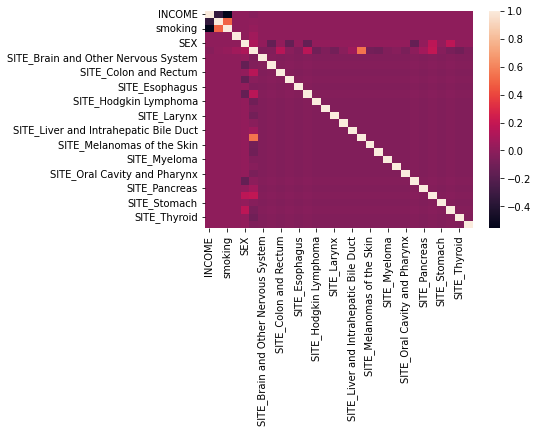

In [31]:
sns.heatmap(corr)

In [ ]:
# plot of 203 raw data points
plt.scatter(lr_df.CRUDE_RATE, lr_df.smoking)
plt.xlabel("Oral Cavity and Pharynx Cancer Mortality Crude Rate")
plt.ylabel("Adult Smoking Rate")
plt.show

## Supervised ML - Linear Regression

In [ ]:
X = lr_df.CRUDE_RATE.values.reshape(-1,1)
X.shape

In [ ]:
y = lr_df.smoking

In [ ]:
model = LinearRegression()
model.fit(X,y)

In [ ]:
y_pred = model.predict(X)
print(y_pred.shape)

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel("Oral Cavity and Pharynx Cancer Mortality Crude Rate")
plt.ylabel("Adult Smoking Rate")
plt.show()

In [ ]:
print(model.coef_)
print(model.intercept_)

In [ ]:
r2_score(y, y_pred)